In [1]:
import pandas as pd

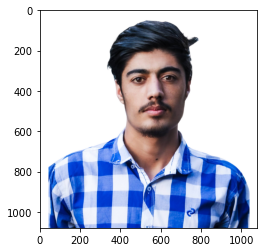

In [2]:
# importing the required modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# importing the image
image = mpimg.imread('Profile.png')

# showing the image
plt.imshow(image)
plt.show()

In [3]:
def high_pass_x_y(image):
  x_var = image[:, :, 1:, :] - image[:, :, :-1, :]
  y_var = image[:, 1:, :, :] - image[:, :-1, :, :]

  return x_var, y_var

In [4]:
# importing the module
import numpy as np

# sobel 3x3 filter - horizonal edges
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
                   
#  3X3 filter -- vertical edge detection
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

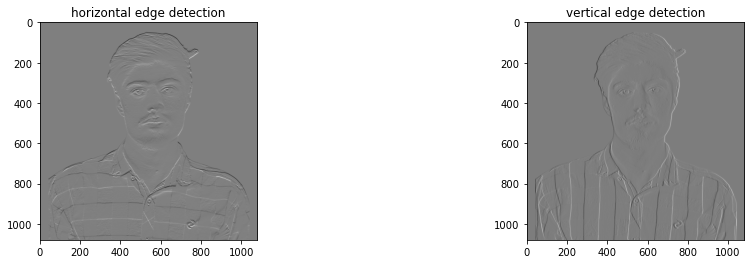

In [5]:
# importing the module
import cv2
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# filter the image using filter 
filtered_image1 = cv2.filter2D(gray, -1, sobel_y)
filtered_image2 = cv2.filter2D(gray, -1, sobel_x)

# plotting the filtered images
f, ax = plt.subplots(1, 2, figsize=(16, 4))

# plotting the horizontal edge detections
ax[0].set_title('horizontal edge detection')
ax[0].imshow(filtered_image1, cmap='gray')

# plotting the vertical edge dections
ax[1].set_title('vertical edge detection')
ax[1].imshow(filtered_image2, cmap='gray')

In [6]:
# importing the required models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model


#initializing the model
model = VGG16()


2022-07-08 11:05:04.017022: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/uca/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-07-08 11:05:04.017106: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-07-08 11:05:26.267856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/uca/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-07-08 11:05:26.267983: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-08 11:05:26.268061: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UCA-Nar): /proc/driver/nvidia/version does not exist
2022-07-08 11:05:26.277333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 11:05:26.985495: W te

553467096/553467096 [==============================] - 622s 1us/step


In [8]:
# looping though each layer
for layer in model.layers:
    
#     conditions
    if 'conv' not in layer.name:
        continue  
        
#     getting the shape of the layers 
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)
    

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [9]:
# looping the layers
for i in range(len(model.layers)):
    
#     checiking for each layer
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
        
#     printing the output
    print(i , layer.name , layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [10]:
# creating a new model with size 224 224
model = Model(inputs=model.inputs , outputs=model.layers[1].output)


In [18]:
# importing the required modules
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

# importing the image and specifying the output size
image = load_img("Profile.png" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)

# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

In [19]:
# importing the module
from tensorflow.keras.applications.vgg16 import preprocess_input

# scaling pixel values
image = preprocess_input(image)

1/1 [==============================] - 0s 30ms/step


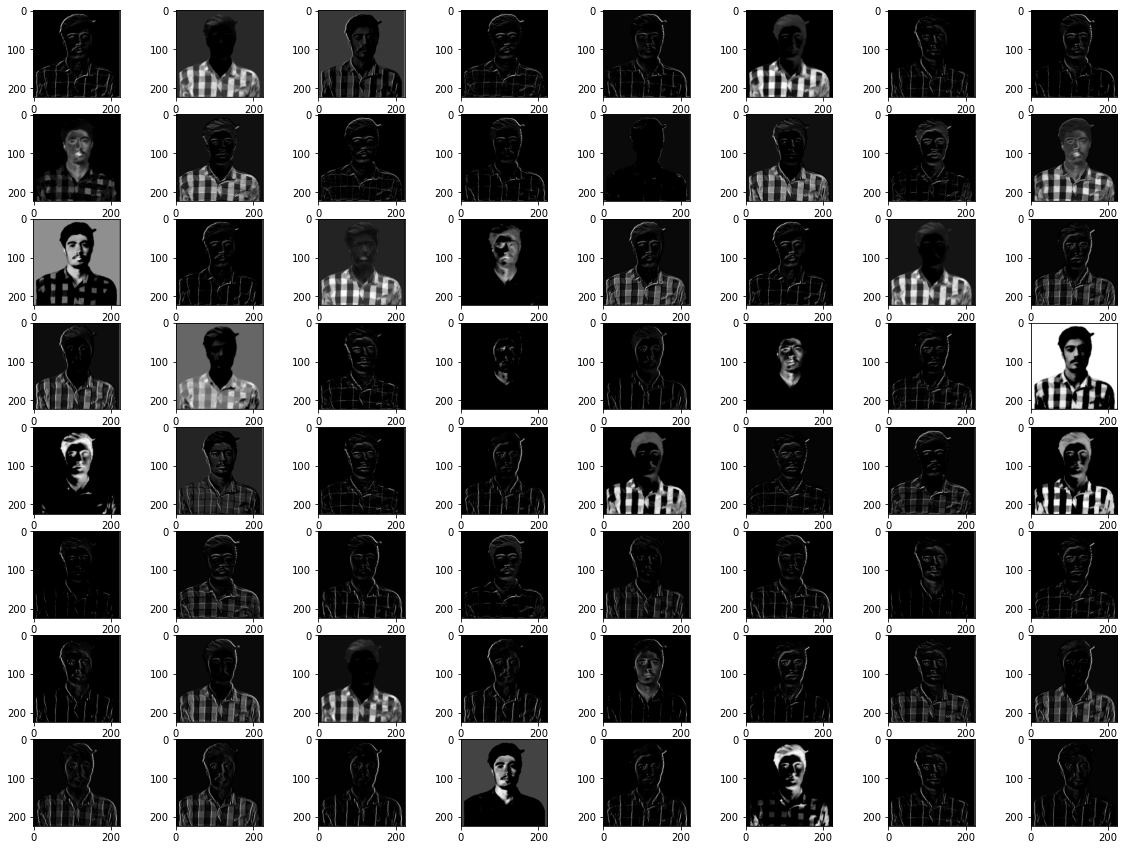

In [22]:
# importing the module
from matplotlib import pyplot

#calculating features_map
features = model.predict(image)

# plotting the size
fig = pyplot.figure(figsize=(20,15))

# looping though each feature
for i in range(1,features.shape[3]+1):
    
#     plotting gray scale image
    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

In [23]:
model2 = VGG16()

In [24]:
model2 = VGG16()
blocks = [ 3, 5 , 10 , 15 , 17]
outputs = [model2.layers[i].output for i in blocks]

model2 = Model( inputs= model2.inputs, outputs = outputs)

1/1 [==============================] - 1s 1s/step


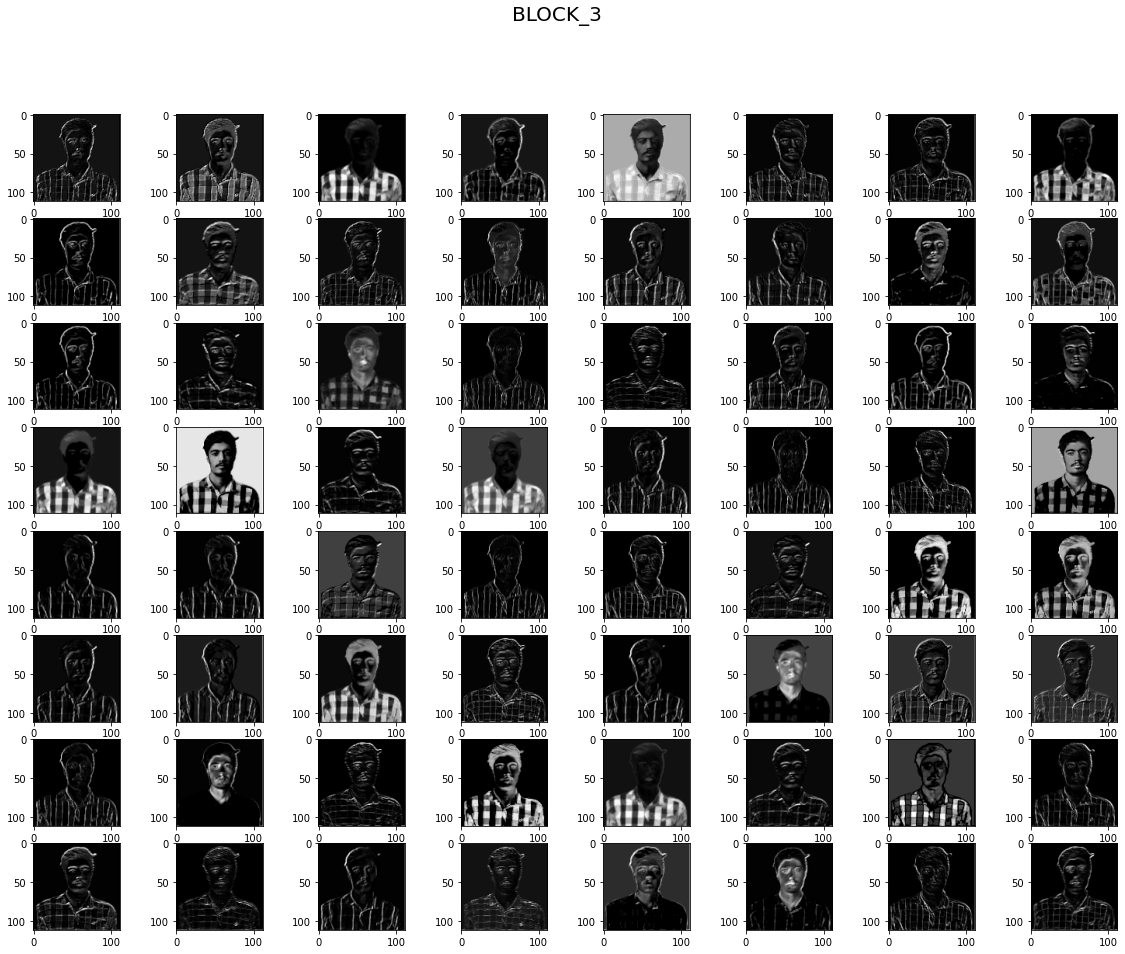

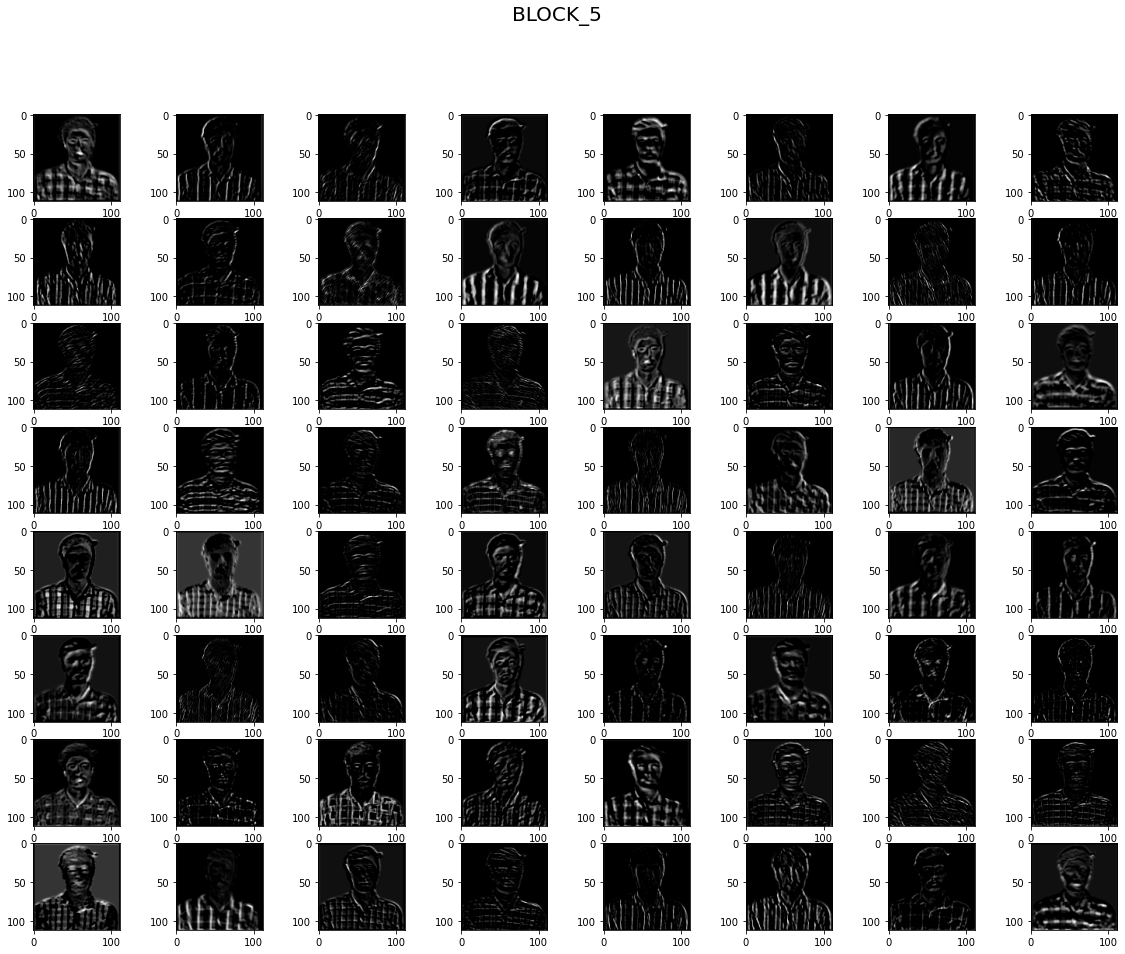

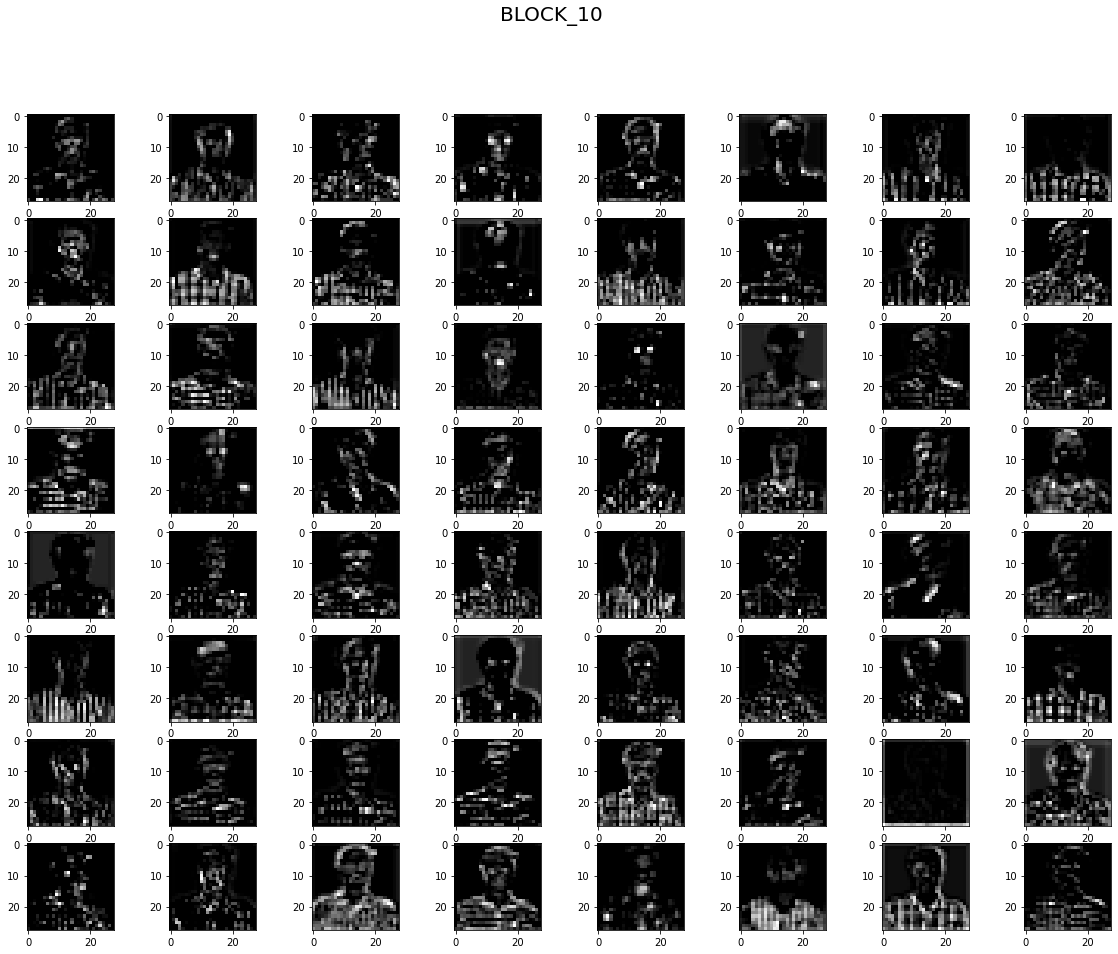

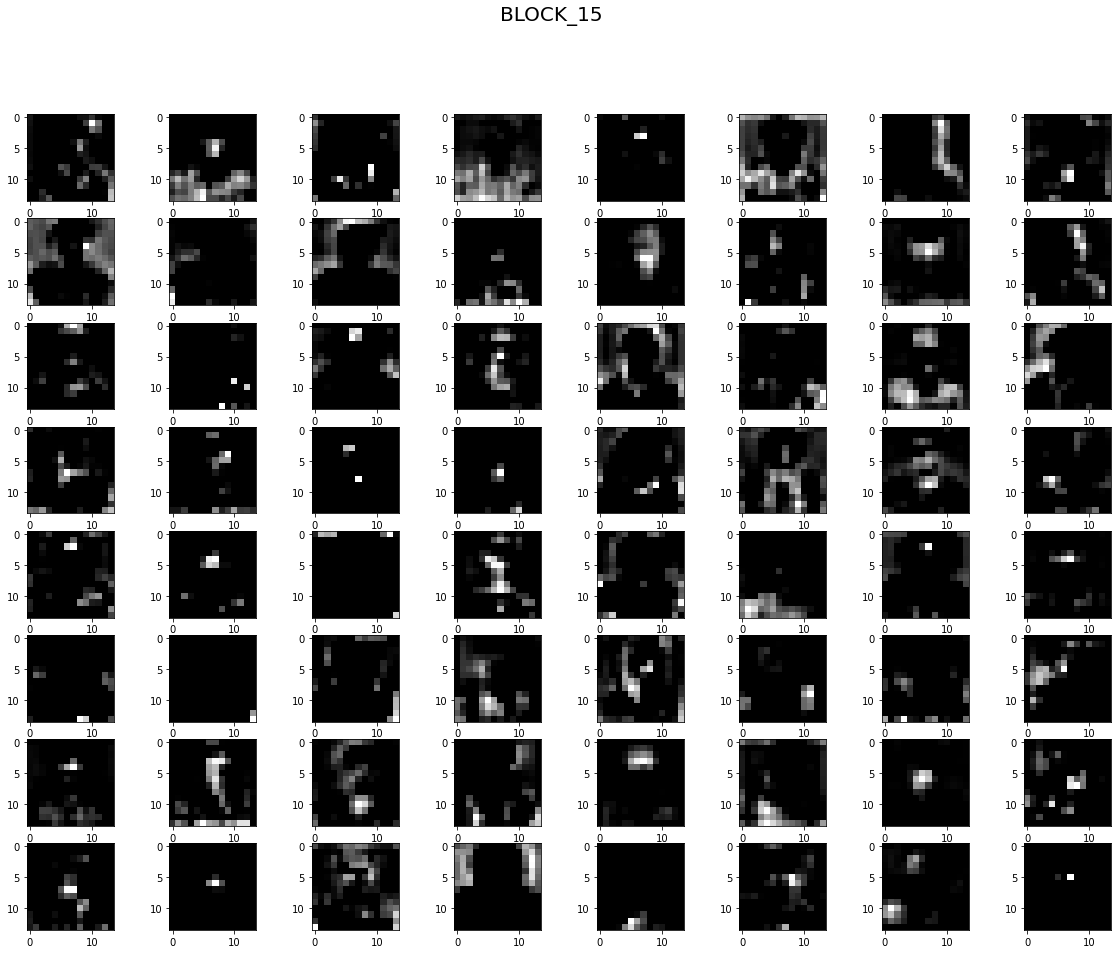

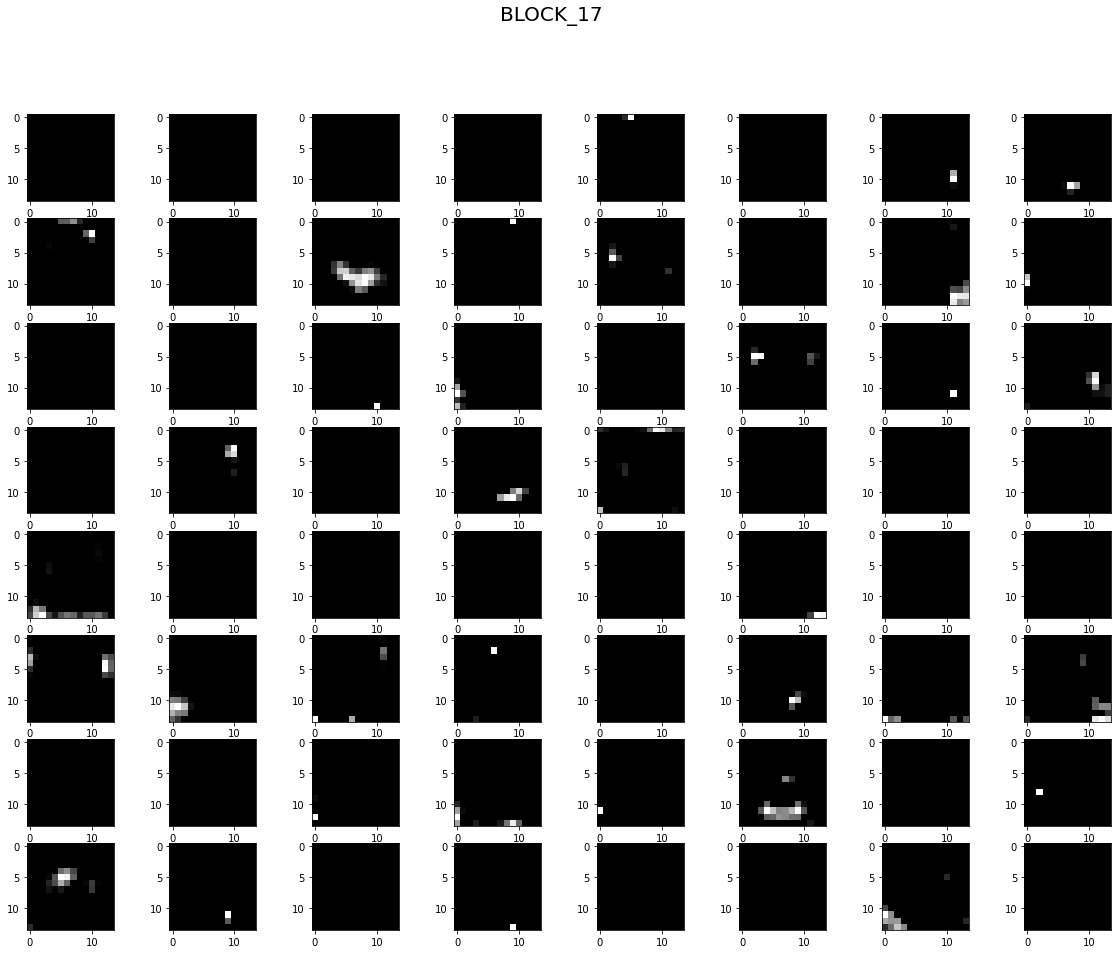

In [25]:
# defining new model
model2 = VGG16()

# listing the layers to be displayed
blocks = [ 3, 5 , 10 , 15 , 17]
outputs = [model2.layers[i].output for i in blocks]

# creating the model and predicting
model2 = Model( inputs= model2.inputs, outputs = outputs)
feature_map = model2.predict(image)


# looping over the feature map and ploting
for i,fmap in zip(blocks,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    
#     visualizing with block number
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

In [33]:
# importing the module
from tensorflow.keras.datasets import mnist

# Importing the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# fixing the size of the images
input_image = x_train[0].reshape(28, 28, 1)


In [36]:
# importing the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Cropping2D


# Create the model
model = Sequential()

# cropping the imge in the CNN layer
model.add(Cropping2D(cropping=((7, 7), (7, 7)), input_shape=(28, 28, 1)))

# printing the summay
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d_1 (Cropping2D)   (None, 14, 14, 1)         0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 386ms/step


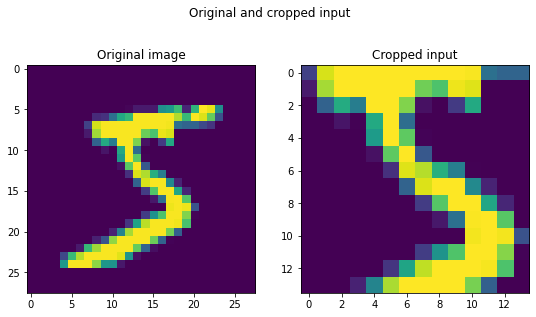

In [37]:
# visualizing the cropped image
model_inputs = np.array([input_image])

# making predictions
outputs_cropped = model.predict(model_inputs)

# getting the first cropped image
outputs_cropped = outputs_cropped[0]


# visualizing both images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(input_image[:, :, 0]) 

# setting the title
axes[0].set_title('Original image')
axes[1].imshow(outputs_cropped[:, :, 0])

# setting the titile
axes[1].set_title('Cropped input')
fig.suptitle(f'Original and cropped input')
fig.set_size_inches(9, 5, forward=True)
plt.show()

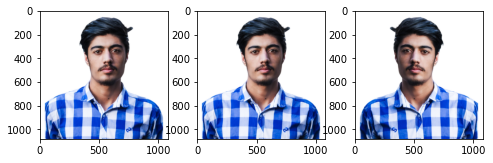

In [51]:
# python program to demonstrate the horizontal flip of the image with the horizontal_flip = True argument

# importing the module
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# loading the image
image = load_img('Profile.png')

# coverting the image to array
dataImage = img_to_array(image)




# expending the dimensions 
imageNew = expand_dims(dataImage, 0)

# flipping horizontally
imageDataGen = ImageDataGenerator(horizontal_flip=True)

# applying the transfromation on the image
iterator = imageDataGen.flow(imageNew, batch_size=1)

plt.figure(figsize=(8, 8))
# using for loop to iterate and visualize
for i in range(3):
    
	# showing subplots
	pyplot.subplot(330 + 1 + i)
    
	# generating images of each batch
	batch = iterator.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

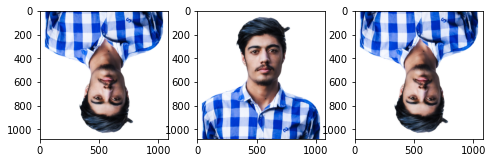

In [52]:
# flipping horizontally
imageDataGen = ImageDataGenerator(vertical_flip=True)

# applying the transfromation on the image
iterator = imageDataGen.flow(imageNew, batch_size=1)

plt.figure(figsize=(8, 8))
# using for loop to iterate and visualize
for i in range(3):
    
	# showing subplots
	pyplot.subplot(330 + 1 + i)
    
	# generating images of each batch
	batch = iterator.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

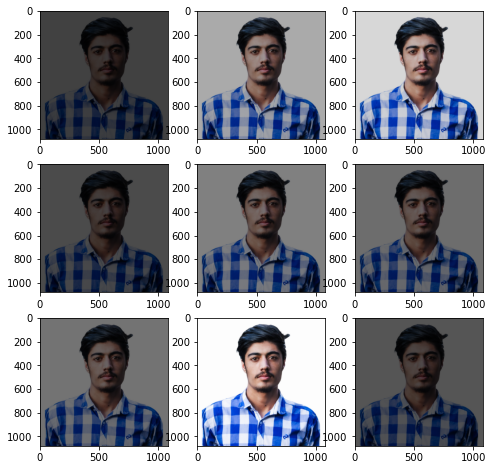

In [54]:

# expand dimension to one sample
samples = expand_dims(dataImage, 0)


# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])

# iterations
it = datagen.flow(samples, batch_size=1)

# plot size
plt.figure(figsize=(8,8))

# generate samples and plot
for i in range(9):
    
	# define subplot
	plt.subplot(330 + 1 + i)
    
	# generate batch of images
	batch = it.next()
    
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
    
	# plot raw pixel data
	plt.imshow(image)
plt.show()